In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
dataMain = pd.read_csv("titanic_train.csv")

In [82]:
df = dataMain.copy(deep = True)

In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

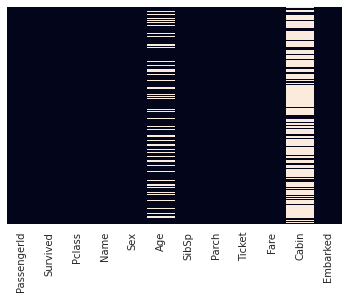

In [84]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

In [85]:
sns.set_style("whitegrid")

<AxesSubplot:xlabel='Survived', ylabel='count'>

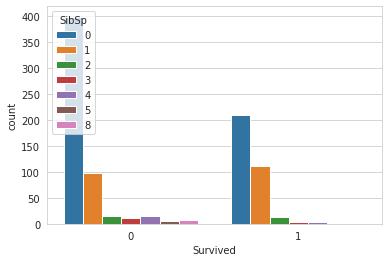

In [86]:
sns.countplot(x = 'Survived', hue = "SibSp", data = df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

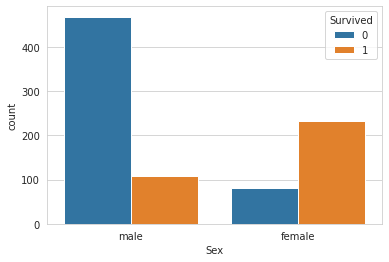

In [87]:
sns.countplot(x = 'Sex', hue = "Survived", data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

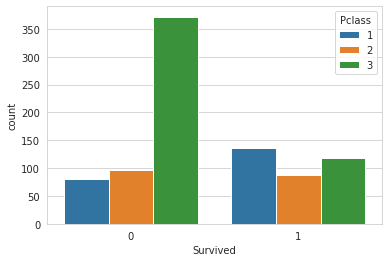

In [88]:
sns.countplot(x = "Survived", hue = "Pclass", data = df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

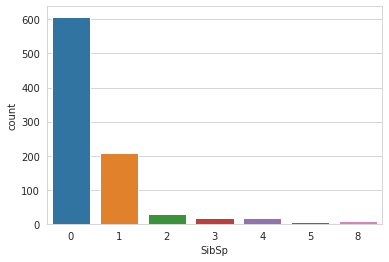

In [89]:
sns.countplot(x = "SibSp", data = df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

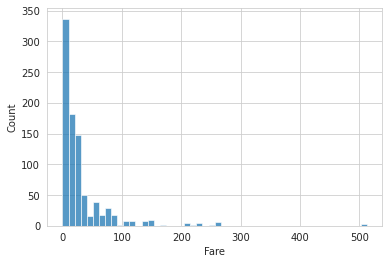

In [90]:
sns.histplot(x = "Fare", data = df, bins = 50)

In [91]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [92]:
def ageClass(num):
    temp = df[df["Pclass"] == num]["Age"]
    
    j = 0
    temp.dropna(inplace = True)
    
    for i in temp:
        
        j += i
    
    j = j/len(temp)
    return j
    

agePclass1 = ageClass(1)
agePclass2 = ageClass(2)
agePclass3 = ageClass(3)

/tmp/ipykernel_6701/2695221636.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace = True)


In [93]:
def imputeAge(cols):
    age = cols[0]
    pclass = cols[1]
    
    if(pd.isnull(age)):
        if(pclass == 1):
            return agePclass1
        
        elif(pclass == 2):
            return agePclass2
        
        elif(pclass == 3):
            return agePclass3
        
    else:
        return age

In [94]:
df["Age"] = df[["Age", "Pclass"]].apply(imputeAge, axis = 1)

In [95]:
print(agePclass1,ageClass(1), "\n" ,  agePclass2, ageClass(2), "\n" ,agePclass3, ageClass(3))

38.233440860215055 38.233440860215026 
 29.87763005780347 29.877630057803472 
 25.14061971830986 25.140619718309818


/tmp/ipykernel_6701/2695221636.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dropna(inplace = True)


In [96]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C


In [97]:
df = df.drop("Cabin", axis = 1)

<AxesSubplot:>

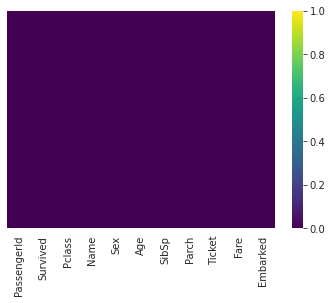

In [98]:
sns.heatmap(df.isnull(), yticklabels = False, cmap = "viridis")

In [99]:
df["Embarked"].dropna(inplace = True)

In [100]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


In [101]:
sex = pd.get_dummies(df["Sex"], drop_first = True)
embark = pd.get_dummies(df["Embarked"], drop_first = True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [102]:
df = pd.concat([df, sex, embark], axis = 1)

In [103]:
df.drop(["Sex", "Embarked"], axis = 1, inplace = True)

In [104]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.00000,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00000,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.00000,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.00000,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.00000,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.00000,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",25.14062,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.00000,0,0,111369,30.0000,1,0,0


In [105]:
df.drop(["Name", "Ticket"], axis = 1, inplace = True)

In [106]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.00000,1,0,7.2500,1,0,1
1,2,1,1,38.00000,1,0,71.2833,0,0,0
2,3,1,3,26.00000,0,0,7.9250,0,0,1
3,4,1,1,35.00000,1,0,53.1000,0,0,1
4,5,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.00000,0,0,13.0000,1,0,1
887,888,1,1,19.00000,0,0,30.0000,0,0,1
888,889,0,3,25.14062,1,2,23.4500,0,0,1
889,890,1,1,26.00000,0,0,30.0000,1,0,0


In [107]:
dataMain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [108]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.292875,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,257.353842,0.486592,0.836071,13.210527,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [109]:
df.drop("PassengerId", axis = 1, inplace = True)

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
XTrain, Xtest, Ytrain, Ytest = train_test_split(df.drop("Survived",  axis = 1, inplace = False), df["Survived"], test_size = 0.3)

In [112]:
XTrain

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
712,1,48.00000,1,0,52.0000,1,0,1
470,3,25.14062,0,0,7.2500,1,0,1
835,1,39.00000,1,1,83.1583,0,0,0
613,3,25.14062,0,0,7.7500,1,1,0
848,2,28.00000,0,1,33.0000,1,0,1
...,...,...,...,...,...,...,...,...
610,3,39.00000,1,5,31.2750,0,0,1
309,1,30.00000,0,0,56.9292,0,0,0
409,3,25.14062,3,1,25.4667,0,0,1
95,3,25.14062,0,0,8.0500,1,0,1


In [113]:
Ytrain

712    1
470    0
835    1
613    0
848    0
      ..
610    0
309    1
409    0
95     0
753    0
Name: Survived, Length: 623, dtype: int64

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
logmodel = LogisticRegression()

In [116]:
logmodel.fit(XTrain, Ytrain)

/home/noir/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
prediction = logmodel.predict(Xtest)

In [118]:
from sklearn.metrics import classification_report

In [119]:
print(classification_report(Ytest, prediction))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       178
           1       0.73      0.77      0.75        90

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.83      0.82      0.83       268



In [120]:
logmodel2 = LogisticRegression()

In [121]:
df2 = df.copy(deep = True)

In [122]:
df2

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0


In [123]:
pclass = pd.get_dummies(df2["Pclass"], drop_first = True)
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [124]:
df2 = pd.concat([df2.drop("Pclass", axis = 1), pclass], axis = 1)

In [125]:
xTrain, xTest, yTrain, ytest = train_test_split(df2.drop("Survived", axis = 1), df2["Survived"], test_size = 0.3)
logmodel2.fit(xTrain, yTrain)

/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/noir/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [126]:
prediction2 = logmodel2.predict(xTest)
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       0.54      0.63      0.58       149
           1       0.42      0.34      0.37       119

    accuracy                           0.50       268
   macro avg       0.48      0.48      0.48       268
weighted avg       0.49      0.50      0.49       268



/home/noir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [127]:
XTrain

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
712,1,48.00000,1,0,52.0000,1,0,1
470,3,25.14062,0,0,7.2500,1,0,1
835,1,39.00000,1,1,83.1583,0,0,0
613,3,25.14062,0,0,7.7500,1,1,0
848,2,28.00000,0,1,33.0000,1,0,1
...,...,...,...,...,...,...,...,...
610,3,39.00000,1,5,31.2750,0,0,1
309,1,30.00000,0,0,56.9292,0,0,0
409,3,25.14062,3,1,25.4667,0,0,1
95,3,25.14062,0,0,8.0500,1,0,1


In [151]:
prediction1 = [2, 22, 0, 100.0000, 1, 0, 1]

df3 = pd.DataFrame(columns = XTrain.columns)


In [139]:
XTrain.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [158]:
df3

,Pclass,Age,SibSp,Parch,Fare,male,Q,S


In [ ]:
df3